## Installing / Importing Packages

The following packages are required for the notebook to work.

In [1]:
#Installing and Importing Packages
from ultralytics import YOLO
import os
import random
from PIL import Image as PILImage, ImageDraw, ImageFont
from IPython.display import display

## Creating YOLOv8 Model

The YOLOv8 model is created.

In [ ]:
#Creating a YOLO model
model = YOLO("yolov8s.pt")

## Training YOLOv8 Model

The model is trained for 5 epochs on the `data.yaml` file provided.

**NOTE: UPDATE THE DATA.YAML FILE PATHS APPROPRIATELY.**

In [ ]:
#Training the model
model.train(data="./data.yaml", split='train', epochs=10)

In [ ]:
model.val(split='val')

In [ ]:
model.val(split='test')

## Display Example Result of Trained Object Detector Model

A random image is selected to test the object detection model on, the predictions are made and the bounding boxes are placed onto the image. The image is then depicted, with the label and confidence added on top the bounding box.

In [ ]:
#Getting a list of all image files in the directory
imageDirectory = "../Object_Detection_Dataset/YOLO/Test/images/"
labelDirectory = "../Object_Detection_Dataset/YOLO/Test/labels/"

#Getting the list of image files
imageFiles = [f for f in os.listdir(imageDirectory) if os.path.isfile(os.path.join(imageDirectory, f))]

#Selecting a random image file
image_file = random.choice(imageFiles)

#Getting the path of the image file
imagePath = os.path.join(imageDirectory, image_file)

#Predicting the bounding boxes for the objects in the image
results = model.predict(imagePath)
result = results[0]
output = []
for box in result.boxes:
    x1, y1, x2, y2 = [round(x) for x in box.xyxy[0].tolist()]
    class_id = box.cls[0].item()
    prob = round(box.conf[0].item(), 2)
    output.append([x1, y1, x2, y2, result.names[class_id], prob])

#Opening the image
image = PILImage.open(imagePath)

#Creating a draw object
draw = ImageDraw.Draw(image)

#Specifying font and size for the label
font = ImageFont.load_default()

#Iterating over each prediction in output
for rectangle_info in output:
    #Extracting rectangle parameters
    x, y, width, height, label, confidence = rectangle_info

    #Drawing the rectangle on the image
    draw.rectangle([x, y, width, height], outline="green", width=2)

    #Placing the label text near the rectangle
    label_text = f"{label} ({confidence:.2f})"
    draw.text((x, y - 15), label_text, fill="green", font=font)

#Displaying the image with the rectangles
display(image)

## Predicting and Saving Predictions

This is used to demo the already trained model.

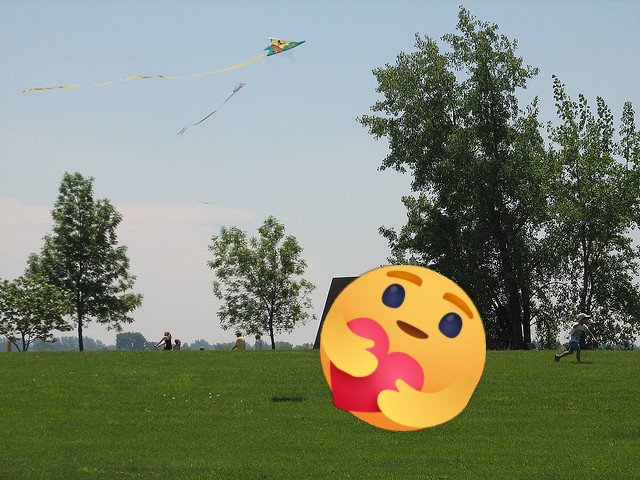

In [2]:
imageDirectory = "../Object_Detection_Dataset/YOLO/Test/images/"

#Loading the trained model
model = YOLO('runs/detect/train/weights/best.pt')

#Getting a random test image
imageFiles = [f for f in os.listdir(imageDirectory) if os.path.isfile(os.path.join(imageDirectory, f))]
image = imageDirectory + random.choice(imageFiles)

#Displaying the image
display(PILImage.open(image))

In [4]:
#Predicting the bounding boxes for the objects in the image
results = model(image, save=True)


image 1/1 c:\Users\icemo\Documents\University\FYP\Project\FYP\YOLOv8\..\Object_Detection_Dataset\YOLO\Test\images\Emojis_1_Image1358.jpeg: 480x640 1 care, 64.6ms
Speed: 4.0ms preprocess, 64.6ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict3
